### El Laplaciano en una cuña
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/VladP008/NotasEDPs/blob/main/EcuacionesElipticas/Cuña/LaplacianoEnUnaCuña.ipynb)



Se tiene el siguiente problema con condiciones de frontera tipo Dirichlet:
\begin{equation}
   \left\{
      \begin{aligned}
        u_{rr} + \frac{1}{r}u_r + \frac{1}{r^2}u_{\theta\theta}= 0 &&0<r<a, \quad 0<\theta<\beta, \\
        u(r,0) =u(r,\beta)=0 && 0<r<a,\\
        \frac{\partial u}{\partial r}(a,\theta) = h(\theta) && 0<\theta<\beta.
      \end{aligned}
    \right.
\end{equation}




La solución de este problema está dada por 
\begin{equation*}
    \boxed{u(r, \theta)=\sum_{n=1}^{\infty}A_n r^{\frac{n\pi}{\beta}}\sin(\frac{n\pi\theta}{\beta})}
\end{equation*}
Donde 
\begin{equation*}
    A_n = a^{1-\frac{n\pi}{\beta}}\frac{2}{n\pi}\int_0^\beta h(\theta)\sin(\frac{n\pi\theta}{\beta})d\theta
\end{equation*}

#### Código para visualizar la solución

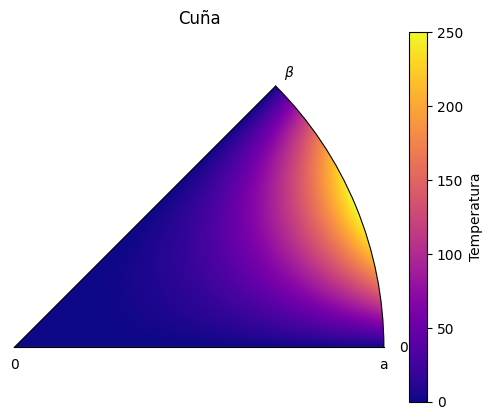

In [2]:
# Se utilizan las siguientes bibliotecas:
import matplotlib.pyplot as plt    # Para las gráficas
import numpy as np                 # Para el uso de arrays
from IPython.display import HTML            # Para poder visualizar la animación en el notebook

# La siguiente instrucción se utiliza para habilitar el modo interactivo en el notebook
%matplotlib inline

# Parámetros del problema
a = 1   # Radio a
beta = np.pi/4    # ángulo beta
N = 2000                      # Número de puntos para la discretización del dominio espacial
theta = np.linspace(0,beta, N + 1)   # Puntos en el intervalo [0,beta] en grados
r = np.linspace(0,a,N + 1 )   # Puntos en el intervalo [0,a]
R,Theta = np.meshgrid(r,theta)
U_pol = np.zeros((N+1,N+1))  # Matriz que guardará la solución para cada (theta,r)
N_s = 3    # Número de términos para la serie 

def coeff(n):
    """Función que regresa el n-ésimo coeficiente de Fourier de la serie
    de en senos de la función h(θ)

    Parametros
    ----------
    n: int
        Número natural mayor o igual a 1.
    
    Returns
    -------
    coeff: float 
        El n-ésimo coeficiente de Fourier de f.
    """
    # Caso 50*sin(\frac{n\pi\theta}{\beta})
    if n == 1:
        coeff = 1000*a**(1-(np.pi/beta))*(beta/np.pi)
    else:
        coeff = 0

    # Caso h = -theta^2 + beta*theta
    #coeff = (beta**2)/(n*np.pi)*(-1)**(n+1)  + (beta**3)/(n*np.pi)*(-1)**(n) + ((beta/n*np.pi)**3)(1-(-1)**n)
    return coeff

def sol():
    """Función que regresa el valor u(r,θ) hasta un número determinado de terminos N_s    
    
    Returns
    -------
    sol: array 
        Solución u(r,θ)
    """
    sol = np.zeros((N+1,N+1))
    for m in range(1,N_s):
        sol = coeff(m)*(R**(m*np.pi/beta))*np.sin((m*np.pi/beta)*Theta) + sol
    return sol

U_pol = sol()  # solución en coordenadas polares


# Se crean las fiiguras y se fijan los parametros 
# Graficar en coordenadas polares
plt.figure()
ax = plt.subplot(111, projection='polar')  # Crear el gráfico polar

mapa_calor = ax.pcolormesh(Theta, R, U_pol, cmap='plasma', shading='auto')

# Añadir una barra de color
calor_bar = plt.colorbar(mapa_calor)
calor_bar.set_label('Temperatura')

# Ajustes de los ejes, etiquetas y título
ax.set_title('El Laplaciano en una cuña')
ax.grid(color='grey', linestyle='-', linewidth=0.1)
# Establecer los límites de theta (solo entre 0 y pi/2)
ax.set_xlim(0, beta)  # Limitar el ángulo a 0 a pi/2

# Títulos y etiquetas
ax.set_title("Cuña")
ax.set_xticks([0, beta])  # angulos
ax.set_xticklabels([r'0', r'$\beta$'])  
ax.set_yticks([0, a])  # radios
ax.set_yticklabels([r'0', r'a'])  

plt.show() # Mostrar gráfico
#plt.savefig("EjemploCuña.png")

